## Intro

This is a notebook to test a simple Style Transfer module and apply it to poor quality artwork.

Special thanks to, https://markojerkic.com/style-transfer-keras/ for the inspiration and the guide to understanding the process.

The start of the notebook is are some style transfer examples while the **Discussion** portion gives further detail into the process.

In [1]:
%load_ext autoreload
%autoreload 2

In [44]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from cv2 import imread

In [45]:
import style_transfer as stx

While, transferring popular styles to pictures or other work is interesting, I think its clever to be able to take some relatively *poor* artwork in the *sense* of a particular style and then apply the famous style to see how it looks.

For example, lets take a really shoddy *starry night* I made in paint and run it through the transfer:

In [4]:
CONTENT_PATH = '../style-transfer-master/examples/bases/junk5.jpg'
STYLE_PATH = '../style-transfer-master/examples/styles/starrynight.jpg'
CONTENT_LAYER = 'block4_conv1'
STYLE_LAYERS = ['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1', 'block5_conv1']

In [6]:
import os
obase = os.path.basename(CONTENT_PATH)
print(obase)

In [7]:
st = stx.StyleTransfer(base_path=CONTENT_PATH, style_path=STYLE_PATH,
                  output_path='../style-transfer-master/output/new_'+obase,
                  content_wt = 0.1,
                  style_wt = 0.1,
                  variance_wt = 0.1,
                  shape=(400,600,3))

content (500, 799, 3)
style (1200, 1500, 3)



In [9]:
st.evaluate_and_create()

Step 0; loss[5.940745e+10]
Step 100; loss[2.3090346e+10]
Step 200; loss[2.2687474e+10]
INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: 22682347520.000000
  Number of iterations: 200
  Number of functions evaluations: 204
New image written...


(500, 799, 3)


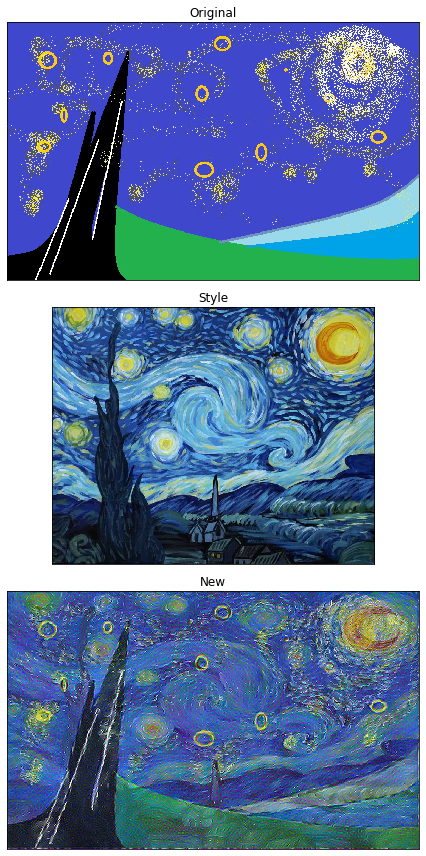

In [10]:
result = imread('../style-transfer-master/output/new_junk5.jpg')
print(result.shape)
result = result[:, :, ::-1] ##switch to RGB

orig = imread('../style-transfer-master/examples/bases/junk5.jpg')
orig = orig[:,:,::-1]

sn = imread('../style-transfer-master/examples/styles/starrynight.jpg')
sn = sn[:,:,::-1]

fig, ax=plt.subplots(3,1,figsize=(12,12))
ax[0].imshow(orig); ax[0].set_title("Original");
ax[1].imshow(sn); ax[1].set_title("Style");
ax[2].imshow(result); ax[2].set_title("New");
ax[0].get_xaxis().set_visible(False);
ax[0].get_yaxis().set_visible(False);
ax[1].get_xaxis().set_visible(False);
ax[1].get_yaxis().set_visible(False);
ax[2].get_xaxis().set_visible(False);
ax[2].get_yaxis().set_visible(False);
plt.tight_layout();

Pretty cool stuff here!


Lets take a look at another using *Hanson-Landscaping* and my junk version.

In [11]:
CONTENT_PATH = '../style-transfer-master/examples/bases/junk7.jpg'
STYLE_PATH = '../style-transfer-master/examples/styles/hanson-landscaping.jpg'
CONTENT_LAYER = 'block4_conv1'
STYLE_LAYERS = ['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1', 'block5_conv1']

In [12]:
obase = os.path.basename(CONTENT_PATH)
print(obase)

junk7.jpg


In [13]:
st = stx.StyleTransfer(base_path=CONTENT_PATH, style_path=STYLE_PATH,
                  output_path='../style-transfer-master/output/new_'+obase,
                  content_wt = 0.1,
                  style_wt = 0.1,
                  variance_wt = 0.1,
                  shape=(400,600,3))

content (500, 799, 3)
style (570, 736, 3)



In [14]:
st.evaluate_and_create()

Step 0; loss[4.8879768e+10]
Step 100; loss[1.6337776e+10]
Step 200; loss[1.5857359e+10]
INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: 15850533888.000000
  Number of iterations: 200
  Number of functions evaluations: 204
New image written...


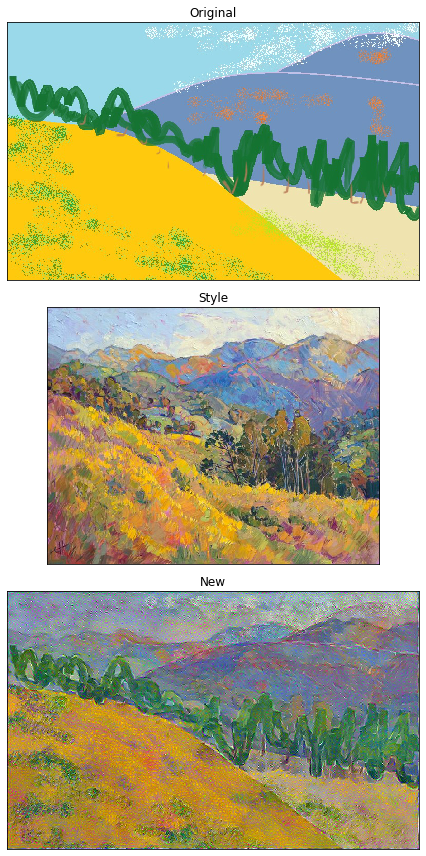

In [46]:
stx.plot_comparison(CONTENT_PATH, STYLE_PATH, '../style-transfer-master/output/new_'+obase)

This is just a small sample of what these style transfers can accomplish.

## Discussion

While the over all method of style transfer seems to be synonymous with Neural Nets and Artificial Intelligence, this simple version here makes it a bit of an abstraction.

While the frame work for implementing the *feautre layers* relies on a prebuilt Convolution NN (the VGG19) in this case, it is really a matter of optimization and minimizing loss. 

In my mind you can think of it like this. The VGG19 framework was built around the identification of objects and its final output is a response vector categorizing a particular item based on probability. When VGG19 was created it was built from many many layers:

In [28]:
from tensorflow.contrib.keras.api.keras.applications import vgg19

In [29]:
model = vgg19.VGG19()

574717952/574710816 [==============================] - 30s 0us/step


In [31]:
outputs_dict = dict([(layer.name, layer.output) for layer in model.layers])
outputs_dict

{'input_1': <tf.Tensor 'input_1:0' shape=(?, 224, 224, 3) dtype=float32>,
 'block1_conv1': <tf.Tensor 'block1_conv1/Relu:0' shape=(?, 224, 224, 64) dtype=float32>,
 'block1_conv2': <tf.Tensor 'block1_conv2/Relu:0' shape=(?, 224, 224, 64) dtype=float32>,
 'block1_pool': <tf.Tensor 'block1_pool/MaxPool:0' shape=(?, 112, 112, 64) dtype=float32>,
 'block2_conv1': <tf.Tensor 'block2_conv1/Relu:0' shape=(?, 112, 112, 128) dtype=float32>,
 'block2_conv2': <tf.Tensor 'block2_conv2/Relu:0' shape=(?, 112, 112, 128) dtype=float32>,
 'block2_pool': <tf.Tensor 'block2_pool/MaxPool:0' shape=(?, 56, 56, 128) dtype=float32>,
 'block3_conv1': <tf.Tensor 'block3_conv1/Relu:0' shape=(?, 56, 56, 256) dtype=float32>,
 'block3_conv2': <tf.Tensor 'block3_conv2/Relu:0' shape=(?, 56, 56, 256) dtype=float32>,
 'block3_conv3': <tf.Tensor 'block3_conv3/Relu:0' shape=(?, 56, 56, 256) dtype=float32>,
 'block3_conv4': <tf.Tensor 'block3_conv4/Relu:0' shape=(?, 56, 56, 256) dtype=float32>,
 'block3_pool': <tf.Tensor 

As you can see, there are many many layers.

What the style transfer here does is take into consideration loss at specific layers and treats the features like a kind of medium that you are going to apply to your artwork.

In the cases above, the model is the medium and it looked at **Starry Night** and based on the layers we specified took those special features built into that layer of **Starry Night** and applied them to our junk version. This is done with the intent to minize the loss (the junk version versus the real version).